In [1]:
# En caso de ejecutar en Google Colab, clonar el repositorio:
#!git clone https://github.com/fco-parga/mna_proyecto_integrador_eq09.git

In [2]:
# En caso de ejecutar en Google Colab, instalar requierimientos:
#!pip install -r mna_proyecto_integrador_eq09/requirements.txt -q

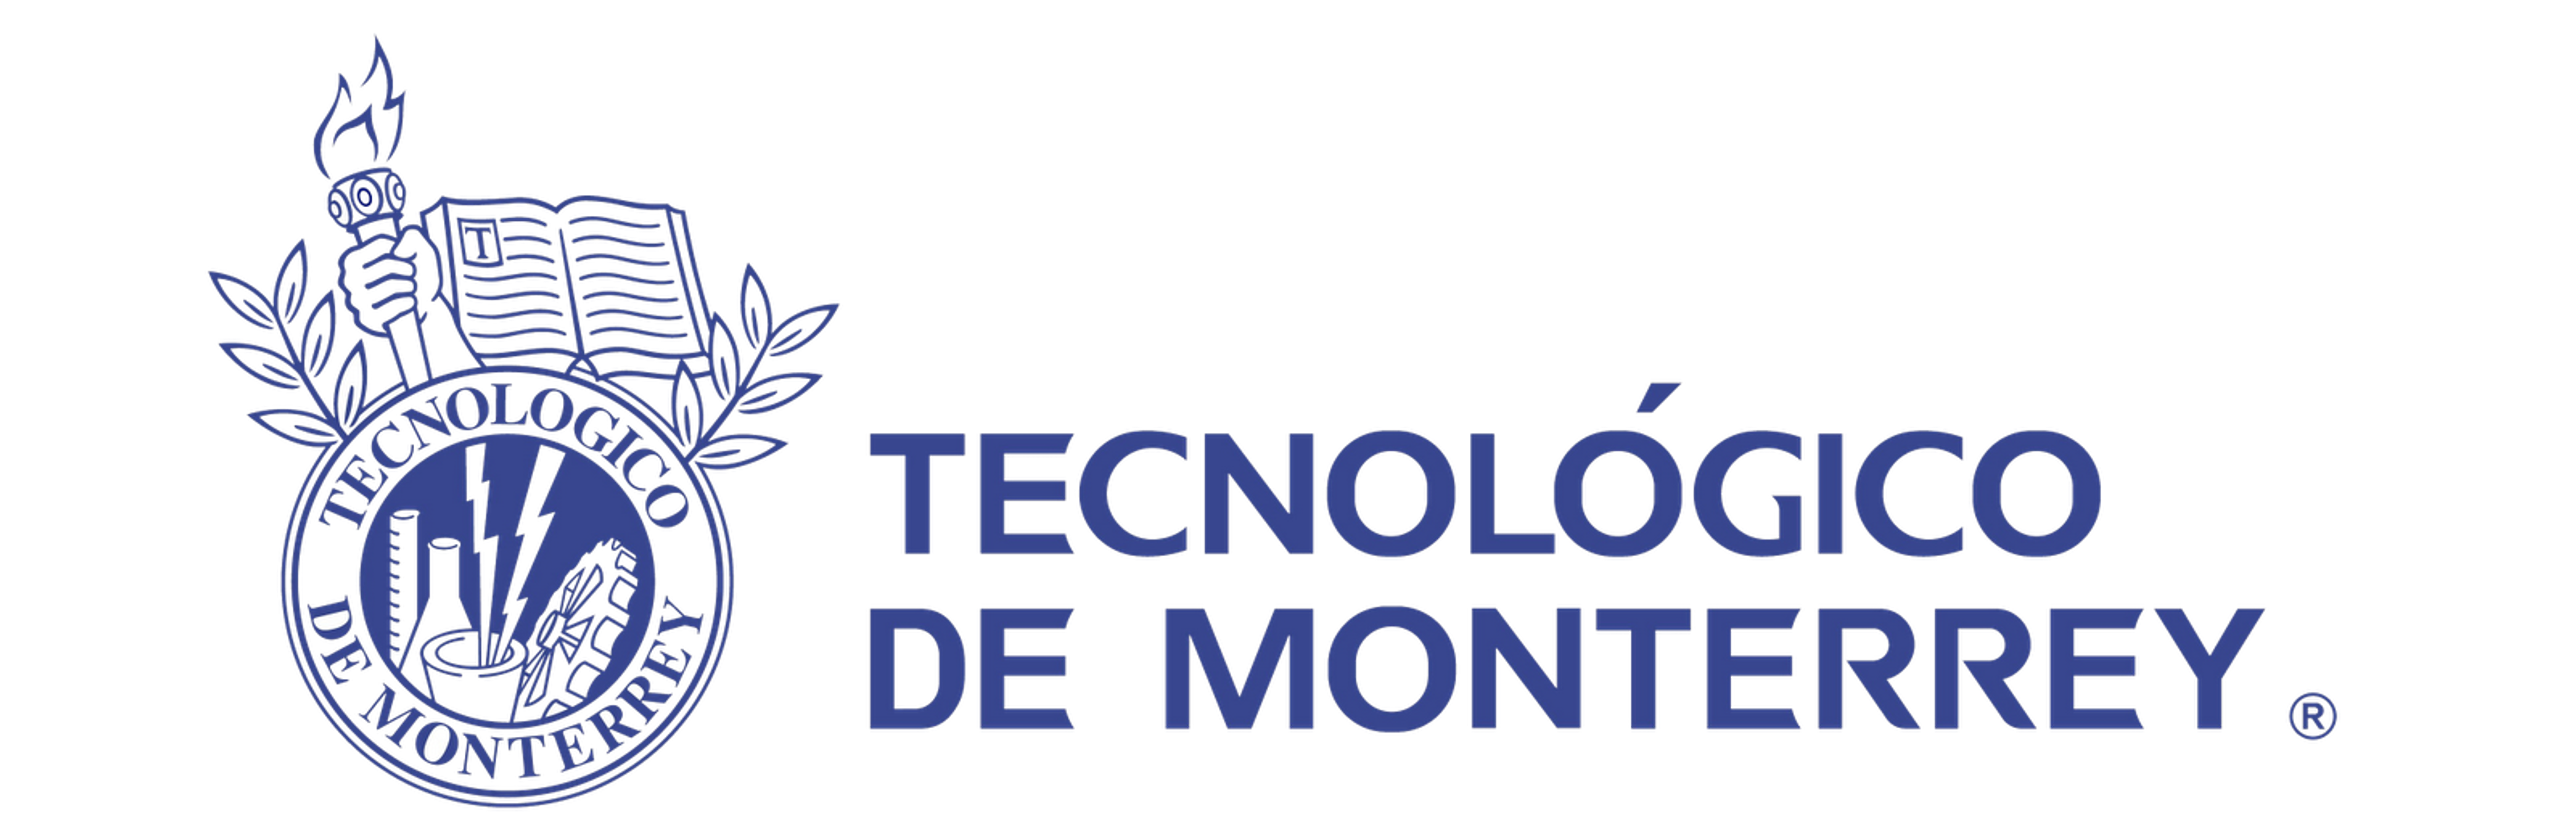

## TC5035 Proyecto integrador
### Tecnológico de Monterrey
#### Dra. Grettel Barceló Alonso
#### Dr. Luis Eduardo Falcón Morales

___


## Equipo 09

### Segmentación de audiencias y detección de respuesta emocional para anuncios digitales exteriores

Integrantes

> - Enrique Hernández García A01793727
> - Alejandro Tomás Mackey A01164338
> - Francisco Javier Parga García A01794380

# Avance 4
## Modelos alternativos

- Objetivos

    3.3 Explorar una gama diversa de técnicas y enfoques con el fin de identificar el de mejor desempeño en el conjunto de datos en cuestión.

    3.4 Encontrar la configuración óptima que maximiza el rendimiento del modelo en una tarea específica.

# Reposiotorio
https://github.com/fco-parga/mna_proyecto_integrador_eq09/

>- EDA:                          https://github.com/fco-parga/mna_proyecto_integrador_eq09/blob/main/Avances/Avance1.09.pdf
>- Ingenieria de caracteristicas https://github.com/fco-parga/mna_proyecto_integrador_eq09/blob/main/Avances/Avance2.09.pdf
>- Baseline                      https://github.com/fco-parga/mna_proyecto_integrador_eq09/blob/main/Avances/Avance3.09.pdf
>- Modelos alternativos          https://github.com/fco-parga/mna_proyecto_integrador_eq09/blob/main/Avances/Avance4.09.pdf

# Folder de librerias

In [3]:
import os
import sys
import time
from pathlib import Path

def add_to_sys_path(project_folder):
    # Get the current working directory
    current_working_dir = os.getcwd()
    
    # Construct the path to the project directory
    project_path = os.path.join(current_working_dir.split(project_folder)[0], project_folder)
    
    # Add the project path to sys.path if it's not already there
    if project_path not in sys.path:
        sys.path.append(project_path)
        print(f"Added {project_path} to sys.path")
    else:
        print(f"{project_path} is already in sys.path")

    os.chdir(project_path)

In [4]:
project_folder_name = "mna_proyecto_integrador_eq09"
add_to_sys_path(project_folder_name)

Added C:\Users\fcopa\OneDrive\Python\mna\mna_proyecto_integrador_eq09 to sys.path


In [5]:
from librerias_integrador.utils import verificar_ambiente

In [6]:
envsys = verificar_ambiente()

Estás trabajando en un sistema Windows.


# Carga de datos

Para aumentar nuestra muestra de datos, tomamos fotos históricas del sistema de vigilancia de la cafetería. Con el objetivo de poder contar con más datos y robustecer el análisis para el modelo de inteligencia artificial.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)

In [8]:
from librerias_integrador.utils import cargar_y_preparar_dataframe

In [9]:
data_path = 'data/'

In [10]:
# Archivo con conteos iniciales
raw_csv = 'raw/hitorical_30min.csv'
raw_data_file = os.path.join(data_path, raw_csv)
raw_df = cargar_y_preparar_dataframe(raw_data_file)

raw_df.head(5)

,country_code,country_name,city_code,city_name,zip_code,lat,lon,cam_id,cam_name,cam_additional_location_description,add_id,add_name,add_type,people,views,females,males,mode_age,median_age,negative_emotion,positive_emotion,average_emotion_score,cars,weather,sport_event,social_event,extraordinary_event,storage_blob
event_timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-04-25 19:24:21.511896-06:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MX/cafe calaverita/2023-04-25 19:24:21.100613-...
2023-04-25 19:54:59.165048-06:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MX/cafe calaverita/2023-04-25 19:54:58.584229-...
2023-04-25 20:25:05.386453-06:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MX/cafe calaverita/2023-04-25 20:25:05.010663-...
2023-04-25 20:56:02.770007-06:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MX/cafe calaverita/2023-04-25 20:56:02.447836-...
2023-04-25 21:26:39.954640-06:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MX/cafe calaverita/2023-04-25 21:26:39.538730-...


## Distribución de conteo

In [11]:
from librerias_integrador.ploteo import plot_df_counts_histogram, plot_df_counts_timeseries

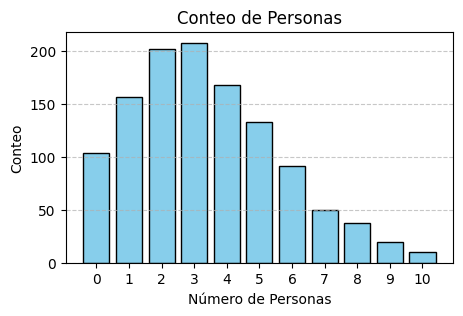

In [12]:
plot_df_counts_histogram(raw_df)

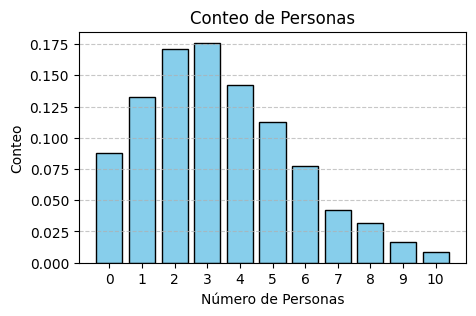

In [13]:
plot_df_counts_histogram(raw_df, normalize=True)

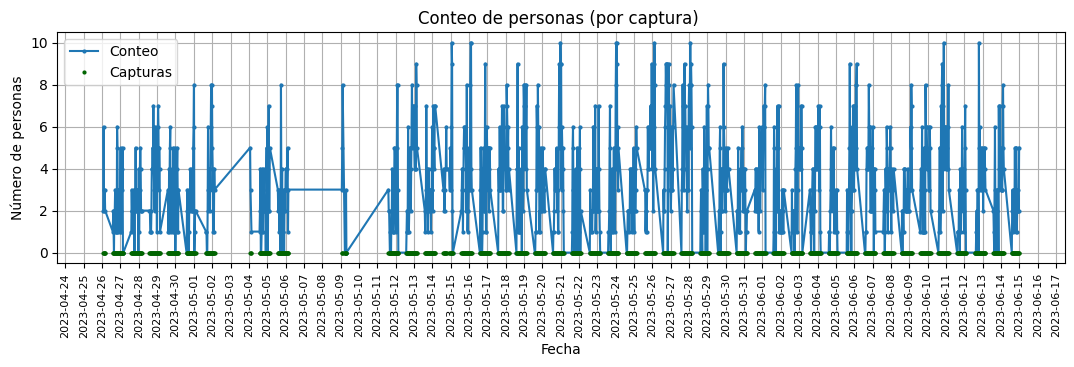

In [14]:
plot_df_counts_timeseries(raw_df, angle=90)

# Agragaciones temporales

In [15]:
grupos_dic = {}
agrupaciones = ['D']

for intervalo in agrupaciones:

    grupos_dic[intervalo] = raw_df.resample(intervalo).agg(
        mean=('people', 'mean'),
        sum=('people', 'sum')
    )

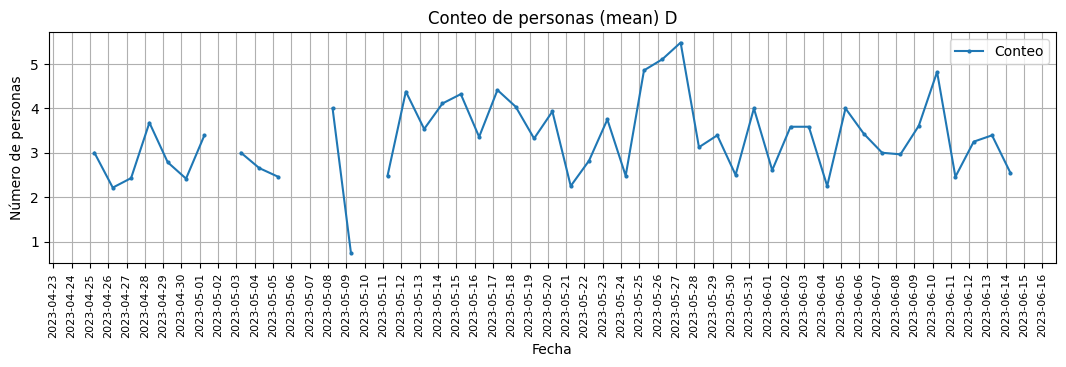

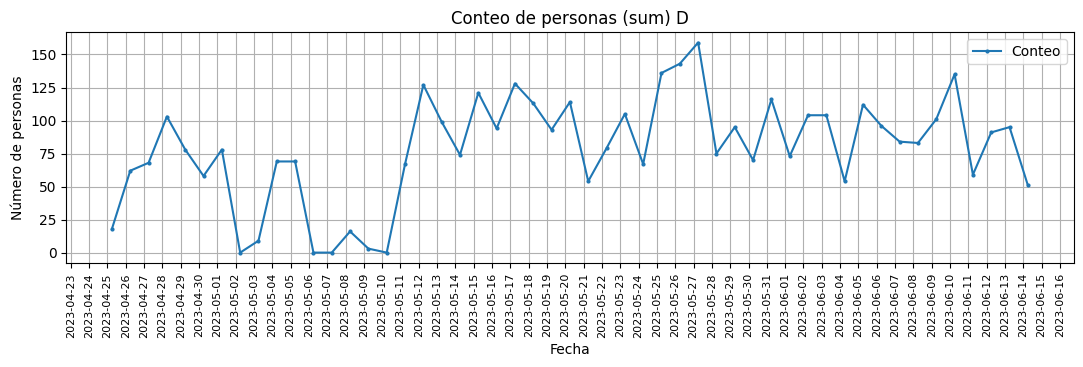

In [16]:
for intervalo in agrupaciones:
    for agg in ['mean','sum']:
        plot_df_counts_timeseries(grupos_dic[intervalo], grouped=True, agg2plot=agg, intervalo=intervalo,angle=90)

La serie de tiempos presentada en el gráfico muestra una variabilidad significativa en el conteo de personas por día, con picos y caídas notables que indican fluctuaciones en la cantidad de personas capturadas. 

El rango de datos va del 25 de abril de 2023 hasta el 14 de junio de 2023, y el número de personas varía de 0 a 150. 

Este comportamiento sugiere que puede haber factores externos o eventos que afectan la presencia de personas en las capturas, resultando en una serie de tiempo con alta variabilidad.

# Ingenieria de caracteristicas

In [17]:
from sklearn.linear_model import LinearRegression

from librerias_integrador.features.datetime_feat import create_date_time_features

En este conjunto de datos hemos creado una característica de tendencia utilizando un modelo de regresión lineal, lo que permite capturar la dirección y velocidad del cambio en tus datos a lo largo del tiempo. 

In [18]:
grupos_dic['D']['timestamp'] = pd.to_datetime(grupos_dic['D'].index)
grupos_dic['D']['trend'] = np.arange(len(grupos_dic['D']))

# Ajustar un modelo de regresión lineal para la tendencia
X = grupos_dic['D'][['trend']]  # Característica de tendencia
y = grupos_dic['D']['sum']  # Variable objetivo
model = LinearRegression()
model.fit(X, y)

# Crear características de tendencia
grupos_dic['D']['trend_feature'] = model.predict(X)

Además, hemos extraído características temporales como el año, mes, día y día de la semana, así como un indicador binario para los fines de semana. Estas características pueden ayudar a los modelos a identificar y aprender patrones estacionales y tendencias a lo largo del tiempo, lo que es esencial para tareas como la predicción y clasificación en series de tiempo.

In [19]:
daily_with_features = create_date_time_features(grupos_dic['D'], 'timestamp')[['sum','trend','trend_feature','year','month','day','weekday','is_weekend']]
daily_with_features.head()

,sum,trend,trend_feature,year,month,day,weekday,is_weekend
event_timestamp,,,,,,,,
2023-04-25 00:00:00-06:00,18,0,49.782805,2023,4,25,1,0
2023-04-26 00:00:00-06:00,62,1,50.930317,2023,4,26,2,0
2023-04-27 00:00:00-06:00,68,2,52.077828,2023,4,27,3,0
2023-04-28 00:00:00-06:00,103,3,53.225339,2023,4,28,4,0
2023-04-29 00:00:00-06:00,78,4,54.372851,2023,4,29,5,1


El resultado de la ingeniería de características muestra una combinación de datos numéricos y categóricos que reflejan tanto la tendencia subyacente como los patrones temporales específicos de los datos. La inclusión de estas características enriquecidas puede mejorar significativamente la capacidad de los modelos de aprendizaje automático para hacer predicciones precisas y proporcionar insights valiosos a partir de los datos de series de tiempo.

# Seleccion de datos

In [20]:
features_columns = ['trend_feature','weekday','is_weekend']
X = daily_with_features[features_columns]
y = daily_with_features['sum'].values

print(f'Dias en el dato: {y.shape[0]}')

Dias en el dato: 51


In [21]:
y[:11]

array([ 18,  62,  68, 103,  78,  58,  78,   0,   9,  69,  69], dtype=int64)

# Separacion de dato

In [22]:
from sklearn.model_selection import train_test_split
random_state = 13

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

print(f'Entrenamiento: {y_train.shape[0]},\nValidacion: {y_test.shape[0]}')

Entrenamiento: 35,
Validacion: 16


# Modelo Dummy

In [24]:
from librerias_integrador.models.dummy import DummyModel

## Entrenamiento (Dummy)

In [25]:
dummy_model = DummyModel()

start_time = time.time()
dummy_model.fit(X_train, y_train)
tot_time = time.time() - start_time

In [26]:
from librerias_integrador.models.plots import plot_model_predictions, plot_predictions_timeseries


train:
  rmse: 37.7383,   mae: 28.9780,   mape: 0.8990,   r2: 0.0000

test:
  rmse: 43.5958,   mae: 35.4321,   mape: 0.9040,   r2: -0.0026


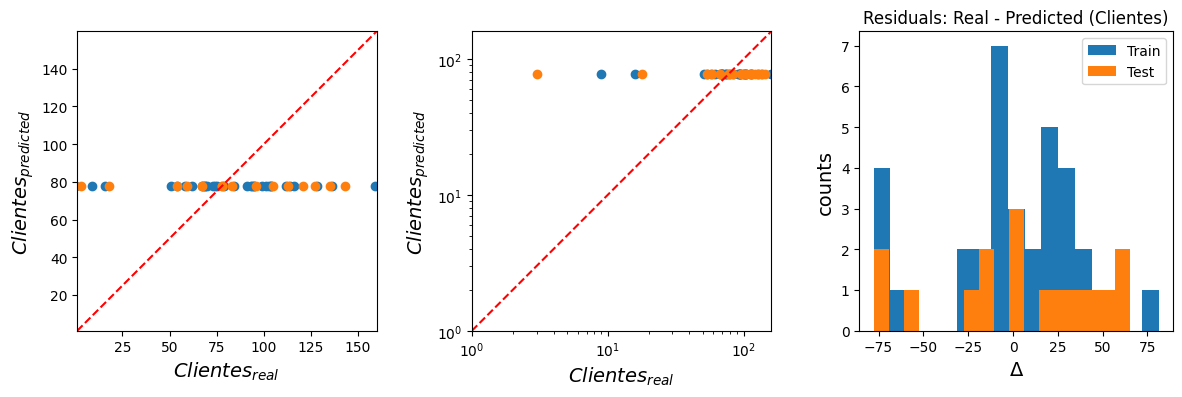

In [27]:
metricas_por_modelo = {}

metricas_por_modelo['dummy'] = plot_model_predictions(dummy_model, X_train, X_test, y_train, y_test, return_metrics=True)
metricas_por_modelo['dummy']['time'] = {'time':tot_time}

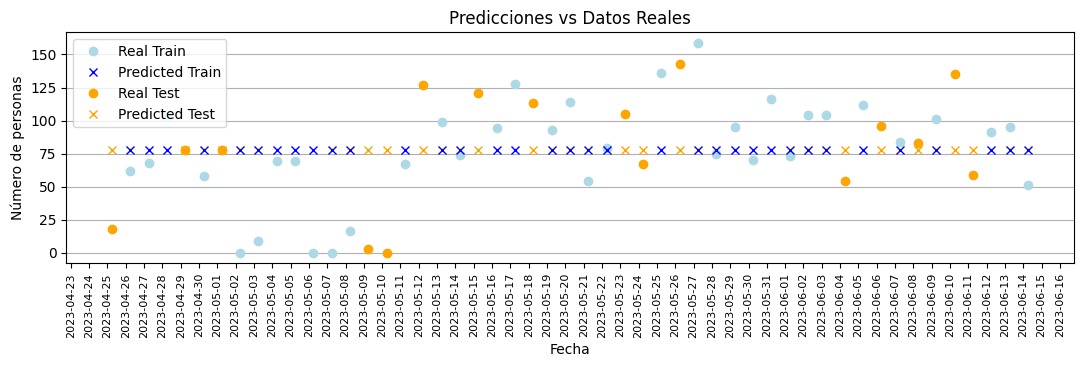

In [28]:
plot_predictions_timeseries(X_train, X_test, y_train, y_test, dummy_model, figsize=(13, 3), labelsize=8, angle=90)

# Ensambles

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, RobustScaler

La pipeline de preprocesamiento y aplicación de modelos de regresión se creó para proporcionar un flujo de trabajo estructurado y eficiente en el proceso de modelado de machine learning. El preprocesamiento es esencial para transformar los datos crudos en un formato adecuado que los modelos de machine learning puedan utilizar eficazmente.

- **XGBoost:** Es un algoritmo de boosting que optimiza modelos de árboles de decisión basados en gradientes. Es conocido por su rendimiento y velocidad, y es especialmente útil para grandes conjuntos de datos.

- **Random Forest:** Es un método de ensamble que construye múltiples árboles de decisión y los combina para obtener una predicción más estable y precisa. Es efectivo para reducir la varianza y evitar el sobreajuste.

- **AdaBoost:** Es un algoritmo de boosting que ajusta los pesos de las observaciones en función de los errores de predicción anteriores, mejorando así la precisión del modelo al centrarse en las observaciones difíciles.

- **Bagging:** Reduce la varianza de los modelos de alta varianza promediando múltiples estimaciones. Es útil cuando los modelos individuales son sensibles a las variaciones en los datos de entrenamiento.

- **Voting:** Combina las predicciones de varios modelos, generalmente utilizando un enfoque de votación mayoritaria o promedio ponderado, para mejorar la robustez y el rendimiento general.

- **Stacking:** Utiliza un meta-modelo para aprender la mejor manera de combinar las predicciones de varios modelos base. A menudo mejora el rendimiento al aprovechar las fortalezas de diferentes modelos.

Cada uno de estos modelos tiene aplicaciones específicas y ventajas que los hacen adecuados para diferentes tipos de problemas de regresión. La elección del modelo depende de las características del conjunto de datos y del problema específico que se está abordando. La pipeline permite la flexibilidad de probar y comparar diferentes modelos de manera sistemática y reproducible.

Referencias
>- Brown, G., Pocock, A., Zhao, M. J., & Luján, M. (2012). Conditional likelihood maximisation: A unifying framework for information theoretic feature selection. Journal of Machine Learning Research, 13(Jan), 27-66.
>- Chen, T., & Guestrin, C. (2016). XGBoost: A scalable tree boosting system. En Proceedings of the 22nd acm sigkdd international conference on knowledge discovery and data mining (pp. 785-794).
>- Dietterich, T. G. (2000). Ensemble methods in machine learning. En International workshop on multiple classifier systems (pp. 1-15). Springer, Berlin, Heidelberg.
Freund, Y., & Schapire, R. E. (1997). A decision-theoretic generalization of on-line learning and an application to boosting. Journal of computer and system sciences, 55(1), 119-139.
>- Ho, T. K. (1995). Random decision forests. En Proceedings of 3rd international conference on document analysis and recognition (Vol. 1, pp. 278-282). IEEE.
>- Schapire, R. E. (1999). A brief introduction to boosting. En Proceedings of the 16th International Joint Conference on Artificial Intelligence - Volume 2 (pp. 1401-1406). Morgan Kaufmann Publishers Inc.

In [31]:
def homogen_pipeline(X, model_type='xgb', random_state=None, gpu=True, predict_mode=False, pretrained=False, estimators=None):
    """
    Crea una pipeline para el preprocesamiento de datos y la aplicación de un modelo de regresión elegido.

    Argumentos:
        X (pandas.DataFrame): Matriz de características.
        model_type (str, opcional): Tipo de modelo de regresión ('xgb' para XGBoost, 'rf' para Random Forest,
                                    'ada' para AdaBoost, 'bag' para Bagging, 'vote' para Votación, 'stack' para Apilamiento).
        random_state (int, opcional): Semilla para el generador de números aleatorios.
        gpu (bool, opcional): Utilizar aceleración por GPU para XGBoost (por defecto es True).
        predict_mode (bool, opcional): Si la tubería se utiliza para predicción (por defecto es False).

    Devuelve:
        sklearn.pipeline.Pipeline: pipeline de regresión.
    """
    total_cols = X.shape[1]
    categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

    # Definir pasos de preprocesamiento
    encoding_step = [
        ('encode_labels', OrdinalEncoder(dtype=int,
                                         handle_unknown='use_encoded_value',
                                         unknown_value=-1,
                                         encoded_missing_value=-2), categorical_columns),
    ]

    scaling_step = [
        ('scaler', RobustScaler(), list(range(total_cols)))  # Aplicar RobustScaler a todas las columnas
    ]
    encoding = ColumnTransformer(encoding_step, remainder='passthrough')
    scaling = ColumnTransformer(scaling_step, remainder='drop')

    # Definir los pasos de la pipeline
    steps = [
        ('encoding', encoding),
        ('scaling', scaling)
    ]

    # Estimadores para Voting y Stacking
    if pretrained:
        estimators = estimators

    else:
        estimators = [('xgb', XGBRegressor(random_state=random_state)),
                      ('rf', RandomForestRegressor(random_state=random_state)),
                      ('ada', AdaBoostRegressor(DecisionTreeRegressor(random_state=random_state),
                                                random_state=random_state)),
                      ('bag', BaggingRegressor(DecisionTreeRegressor(random_state=random_state),
                                               random_state=random_state))]

    # ñadir el modelo elegido
    if model_type == 'xgb':
        if gpu and not predict_mode:
            # XGBoost con GPU
            steps.append(('regressor', XGBRegressor(random_state=random_state, device="cuda")))
        else:
            # XGBoost sin GPU
            steps.append(('regressor', XGBRegressor(random_state=random_state)))
    elif model_type == 'rf':
        # Random Forest
        steps.append(('regressor', RandomForestRegressor(random_state=random_state)))
    elif model_type == 'ada':
        # AdaBoost
        steps.append(('regressor', AdaBoostRegressor(DecisionTreeRegressor(random_state=random_state),
                                                     random_state=random_state)))
    elif model_type == 'bag':
        # Bagging
        steps.append(('regressor', BaggingRegressor(DecisionTreeRegressor(random_state=random_state),
                                                    random_state=random_state)))
    elif model_type == 'vote':
        # Voting        
        steps.append(('regressor', VotingRegressor(estimators)))
        
    elif model_type == 'stack':
        # Stacking
        final_estimator = RandomForestRegressor(random_state=random_state)
        steps.append(('regressor', StackingRegressor(estimators=estimators, final_estimator=final_estimator)))

    # Crear la pipeline
    regression_pipe = Pipeline(steps)

    return regression_pipe

## XGB

In [32]:
xgb_pipe = homogen_pipeline(X, model_type='xgb', random_state=random_state, gpu=True, predict_mode=False)
xgb_pipe

Pipeline(steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode_labels',
                                                  OrdinalEncoder(dtype=<class 'int'>,
                                                                 encoded_missing_value=-2,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [])])),
                ('scaling',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  [0, 1, 2])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=13, ...))])

In [33]:
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV, KFold, train_test_split
from sklearn.metrics import make_scorer

from librerias_integrador.models.metrics import neg_root_mean_squared_error
from librerias_integrador.models.plots import plot_cv_results

rmse_scorer = make_scorer(neg_root_mean_squared_error, greater_is_better=True)

In [34]:
max_n_jobs = 8
cv_n_splits = 3
n_iter = 2000
list_size = 19
verbose = 3
random_state = 13

El RandomizedSearchCV es una técnica de optimización de hiperparámetros que selecciona al azar combinaciones de hiperparámetros para encontrar la mejor solución para un modelo de aprendizaje automático. A diferencia de GridSearchCV, que prueba todas las combinaciones posibles, RandomizedSearchCV mejora la eficiencia al probar solo un número fijo de combinaciones, lo que puede ser especialmente útil cuando se trabaja con un gran espacio de hiperparámetros o cuando se busca una solución de alta calidad en un tiempo razonable.

Por otro lado, KFold es un método de validación cruzada que divide el conjunto de datos en k subconjuntos (o “folds”). En cada iteración, un subconjunto diferente se utiliza como conjunto de prueba y los restantes como conjunto de entrenamiento. Esto ayuda a evaluar la robustez del modelo y a obtener una estimación más precisa de su rendimiento. Al utilizar n_splits=cv_n_splits, se define el número de divisiones que se realizarán. El parámetro shuffle=True asegura que los datos se barajen antes de dividirlos, lo que es útil para evitar sesgos relacionados con el orden de los datos. El random_state=random_state se utiliza para garantizar la reproducibilidad del proceso de división.

En resumen, el uso de RandomizedSearchCV con KFold proporciona una forma eficiente y robusta de seleccionar los mejores hiperparámetros para un modelo, mientras se valida su rendimiento de manera confiable y reproducible.

Referencia:
>- Bergstra, J., & Bengio, Y. (2012). Random search for hyper-parameter optimization. Journal of Machine Learning Research, 13(Feb), 281-305.

In [35]:
cv = KFold(n_splits=cv_n_splits, shuffle=True, random_state=random_state)
alpha_list = list(np.round(stats.lognorm.rvs(0.93, size=list_size)/10,4))

In [36]:
xgb_scan_parameters = {
    "regressor__n_estimators": [5,7,17,23,29,39,47,57,79,91,129,179,279], # 'n_estimators': Número de árboles a construir.
    "regressor__scale_pos_weight":[0,1,3,5,7,13], # 'scale_pos_weight': Ponderación de las clases positivas en el caso de desbalance de clases.
    "regressor__subsample":[0.6,0.7,0.8,0.9,1], # 'subsample': Fracción de muestras a utilizar para cada árbol. Valores bajos pueden llevar a underfitting.
    "regressor__learning_rate":[0.05, 0.01, 0.1], # 'learning_rate': Tasa de aprendizaje, también conocida como 'eta'.
    "regressor__gamma": alpha_list, # 'gamma': Parámetro de regularización que controla la poda de los árboles.
    'regressor__lambda': alpha_list, # 'lambda': Término de regularización L2 en los pesos.
    "regressor__colsample_bytree":[0.7,0.8,0.9,1], # 'colsample_bytree': Fracción de características a utilizar para cada árbol.
    "regressor__colsample_bylevel":[0.7,0.8,0.9,1], # 'colsample_bylevel': Fracción de características a utilizar por nivel en cada árbol.
    'regressor__max_depth': [5,6,7,8,9,11,13,17,23] # 'max_depth': Profundidad máxima de cada árbol. Valores altos pueden llevar a overfitting.
}

In [37]:
xgb_random = RandomizedSearchCV(xgb_pipe,
                                  param_distributions=xgb_scan_parameters, 
                                  n_iter=n_iter,
                                  cv=cv,
                                  n_jobs=max_n_jobs,
                                  verbose=verbose, 
                                  scoring=rmse_scorer,#'r2')
                                  return_train_score=True, refit=True)

### Entrenamiento xgb

In [38]:
start_time = time.time()

xgb_random.fit(X_train, y_train)
xgb_fitted = xgb_random.best_estimator_

print("--- %s Minutes on training time  ---" % (round((time.time() - start_time)/60,2)))

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits
--- 17.81 Minutes on training time  ---


Train Median per CV: [(0, -17.8165), (1, -15.5941), (2, -14.0851)]
Test Median per CV: [(0, -22.6754), (1, -33.427), (2, -42.1338)]


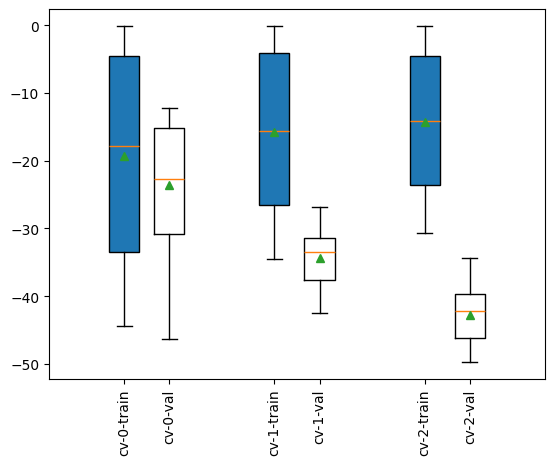

In [39]:
plot_cv_results(xgb_random.cv_results_, cv_splits=cv)

In [40]:
print("Best parameter (CV score=%0.3f):" % xgb_random.best_score_)
print(xgb_random.best_params_)

Best parameter (CV score=-29.872):
{'regressor__subsample': 0.9, 'regressor__scale_pos_weight': 1, 'regressor__n_estimators': 39, 'regressor__max_depth': 11, 'regressor__learning_rate': 0.05, 'regressor__lambda': 0.2162, 'regressor__gamma': 0.2847, 'regressor__colsample_bytree': 0.8, 'regressor__colsample_bylevel': 0.8}



train:
  rmse: 16.1145,   mae: 11.8089,   mape: 0.8990,   r2: 0.8177

test:
  rmse: 30.3591,   mae: 26.9094,   mape: 0.9040,   r2: 0.5138


C:\Users\fcopa\anaconda3\envs\integrador\lib\site-packages\xgboost\core.py:160: UserWarning: [20:56:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


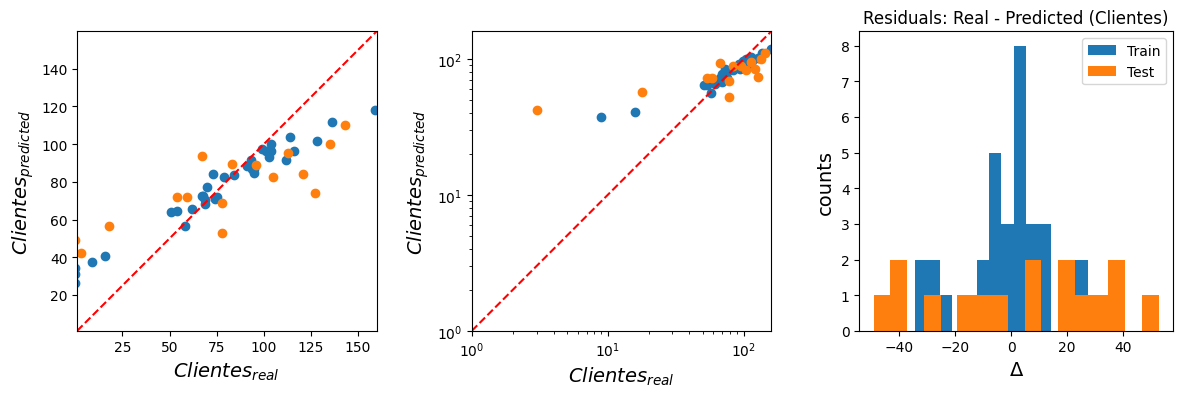

In [41]:
metricas_por_modelo['xgb'] = plot_model_predictions(xgb_fitted, X_train, X_test, y_train, y_test, return_metrics=True)
metricas_por_modelo['xgb']['time'] = {'time':xgb_random.cv_results_['mean_fit_time'][xgb_random.best_index_]}

In [42]:
def plot_features(feature_importances, X_train):
    features_coef = pd.DataFrame(zip(X_train.columns, feature_importances), columns=['feature','coef']).sort_values(by='coef', ascending=True)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 1))
    ax.barh(features_coef['feature'], features_coef['coef'], )
    
    for i, v in enumerate(features_coef['coef'],):
        ax.text(v +.01, i -0.3, str(round(v,3)), color='blue', fontweight='bold')
        
    plt.show()
    

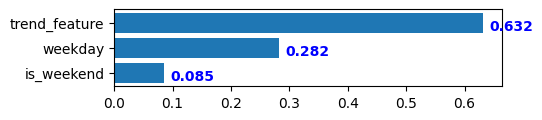

In [43]:
xgb_fi = xgb_fitted.named_steps['regressor'].feature_importances_
plot_features(xgb_fi, X_train)

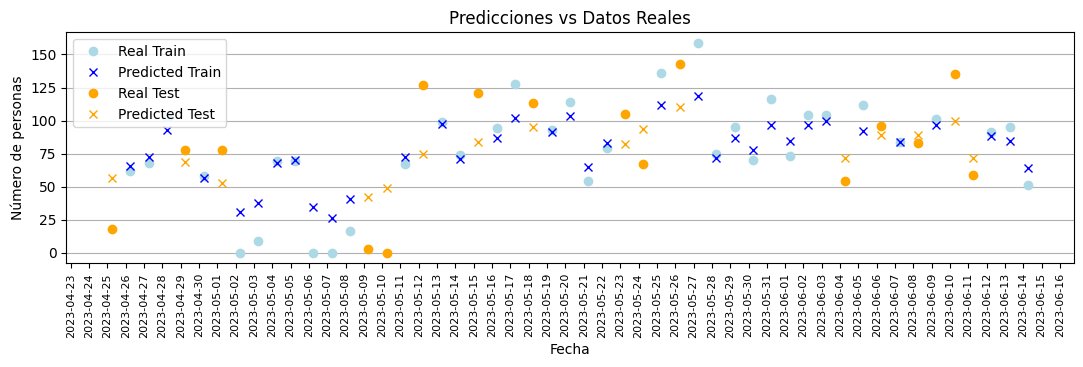

In [44]:
plot_predictions_timeseries(X_train, X_test, y_train, y_test, xgb_fitted, figsize=(13, 3), labelsize=8, angle=90)

## Random Forest

In [45]:
rf_pipe = homogen_pipeline(X, model_type='rf', random_state=random_state, gpu=False, predict_mode=False)
rf_pipe

Pipeline(steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode_labels',
                                                  OrdinalEncoder(dtype=<class 'int'>,
                                                                 encoded_missing_value=-2,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [])])),
                ('scaling',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  [0, 1, 2])])),
                ('regressor', RandomForestRegressor(random_state=13))])

In [46]:
uniform_floats = np.random.default_rng().uniform(0.2, 1, list_size)

rf_scan_parameters = {
    "regressor__n_estimators": [10, 50, 100, 150, 200, 300, 400],  # Número de árboles en el bosque
    "regressor__criterion": ['friedman_mse', 'squared_error', 'poisson', 'absolute_error'],  # Función para medir la calidad de una división
    "regressor__max_depth": [3, 5, 10, 15, 20],  # Profundidad máxima del árbol
    "regressor__min_samples_split": [2, 5, 10, 15, 20],  # Número mínimo de muestras requeridas para dividir un nodo
    "regressor__min_samples_leaf": [2, 4, 6, 8],  # Número mínimo de muestras requeridas en un nodo hoja
    "regressor__max_features": uniform_floats.tolist(),  # Número de características a considerar al buscar la mejor división
    "regressor__bootstrap": [True, False],  # Método de selección de muestras para entrenar cada árbol
    "regressor__min_impurity_decrease": [0.0, 0.1, 0.2, 0.3, 0.4],  # Umbral para la disminución de impureza
    "regressor__max_leaf_nodes": [3, 10, 20, 30, 40, 50],  # Número máximo de nodos hoja
    "regressor__min_weight_fraction_leaf": [0.0, 0.1, 0.2, 0.3, 0.4],  # Fracción mínima ponderada de la suma total de pesos requerida para estar en un nodo hoja
    "regressor__ccp_alpha": alpha_list # Parámetro de regularización que controla la poda de los árboles.
}

In [47]:
rf_random = RandomizedSearchCV(rf_pipe,
                                  param_distributions=rf_scan_parameters, 
                                  n_iter=n_iter,
                                  cv=cv,
                                  n_jobs=max_n_jobs,
                                  verbose=verbose, 
                                  scoring=rmse_scorer,#'r2')
                                  return_train_score=True, refit=True)

### Entrenamiento RF

In [48]:
start_time = time.time()

rf_random.fit(X_train, y_train)
rf_fitted = rf_random.best_estimator_

print("--- %s Minutes on training time  ---" % (round((time.time() - start_time)/60,2)))

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits
--- 2.3 Minutes on training time  ---


Train Median per CV: [(0, -36.7636), (1, -31.2206), (2, -28.1761)]
Test Median per CV: [(0, -14.733), (1, -37.9968), (2, -45.5959)]


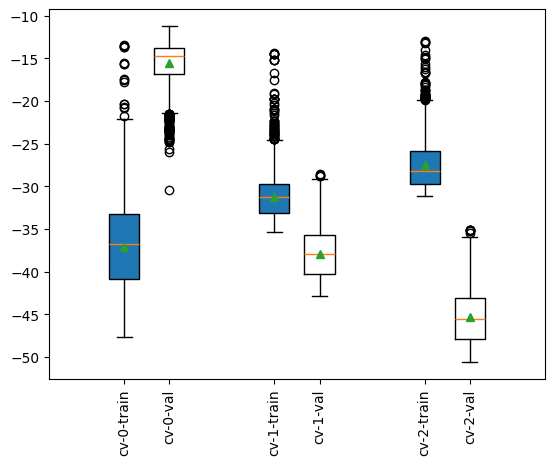

In [49]:
plot_cv_results(rf_random.cv_results_, cv_splits=cv)

In [50]:
print("Best parameter (CV score=%0.3f):" % rf_random.best_score_)
print(rf_random.best_params_)

Best parameter (CV score=-28.494):
{'regressor__n_estimators': 50, 'regressor__min_weight_fraction_leaf': 0.1, 'regressor__min_samples_split': 20, 'regressor__min_samples_leaf': 2, 'regressor__min_impurity_decrease': 0.4, 'regressor__max_leaf_nodes': 3, 'regressor__max_features': 0.9230664565870295, 'regressor__max_depth': 10, 'regressor__criterion': 'poisson', 'regressor__bootstrap': False}



train:
  rmse: 27.1543,   mae: 20.8944,   mape: 0.8990,   r2: 0.4823

test:
  rmse: 33.7325,   mae: 29.0410,   mape: 0.9040,   r2: 0.3997


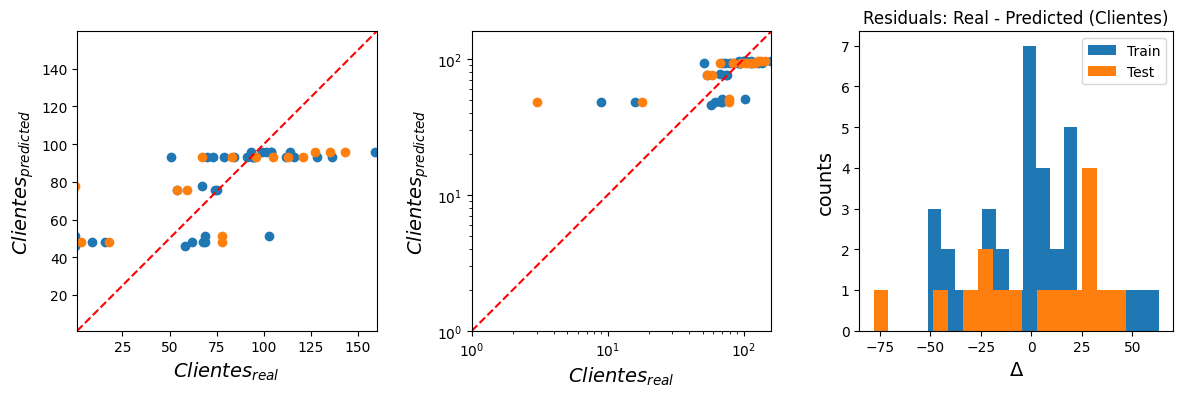

In [51]:
metricas_por_modelo['rf'] = plot_model_predictions(rf_fitted, X_train, X_test, y_train, y_test, return_metrics=True)
metricas_por_modelo['rf']['time'] = {'time':rf_random.cv_results_['mean_fit_time'][rf_random.best_index_]}

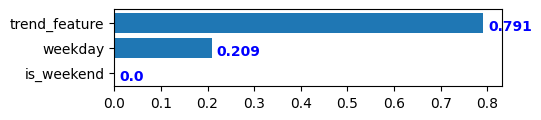

In [52]:
rf_fi = rf_fitted.named_steps['regressor'].feature_importances_
plot_features(rf_fi, X_train)

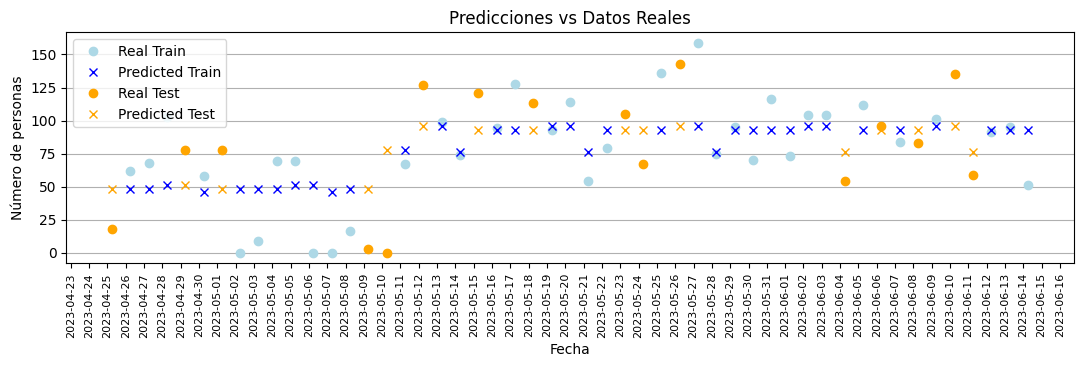

In [53]:
plot_predictions_timeseries(X_train, X_test, y_train, y_test, rf_fitted, figsize=(13, 3), labelsize=8, angle=90)

## AdaBoost

In [54]:
ada_pipe = homogen_pipeline(X, model_type='ada', random_state=random_state, gpu=False, predict_mode=False)
ada_pipe

Pipeline(steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode_labels',
                                                  OrdinalEncoder(dtype=<class 'int'>,
                                                                 encoded_missing_value=-2,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [])])),
                ('scaling',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  [0, 1, 2])])),
                ('regressor',
                 AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=13),
                                   random_state=13))])

In [55]:
ada_learning_rate = np.logspace(-4, 0.1, num=list_size).tolist()[:-1]

ada_scan_parameters = {
    'regressor__n_estimators': [50, 100, 200, 300],  # Número de estimadores
    'regressor__learning_rate': ada_learning_rate,  # Tasa de aprendizaje
    'regressor__loss': ['linear', 'square', 'exponential'],  # Función de pérdida
    'regressor__estimator__max_depth': [3, 4, 5, 6, 10],  # Profundidad máxima para el DecisionTreeRegressor
    'regressor__estimator__min_samples_split': [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
    'regressor__estimator__min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras en un nodo hoja
    'regressor__estimator__max_features': uniform_floats.tolist()  # Número de características para buscar la mejor división
}

In [56]:
ada_random = RandomizedSearchCV(ada_pipe,
                                  param_distributions=ada_scan_parameters, 
                                  n_iter=n_iter,
                                  cv=cv,
                                  n_jobs=max_n_jobs,
                                  verbose=verbose, 
                                  scoring=rmse_scorer,#'r2')
                                  return_train_score=True, refit=True)

### Entrenamiento AdaBoost

In [57]:
start_time = time.time()

ada_random.fit(X_train, y_train)
ada_fitted = ada_random.best_estimator_

print("--- %s Minutes on training time  ---" % (round((time.time() - start_time)/60,2)))

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits
--- 2.99 Minutes on training time  ---


Train Median per CV: [(0, -20.7468), (1, -20.0886), (2, -18.7)]
Test Median per CV: [(0, -22.766), (1, -33.8979), (2, -39.0891)]


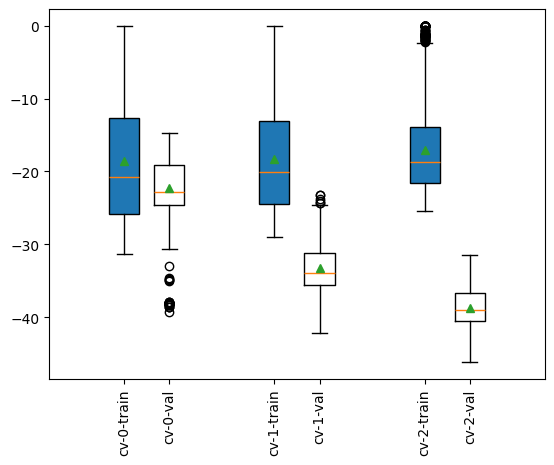

In [58]:
plot_cv_results(ada_random.cv_results_, cv_splits=cv)

In [59]:
print("Best parameter (CV score=%0.3f):" % ada_random.best_score_)
print(ada_random.best_params_)

Best parameter (CV score=-26.225):
{'regressor__n_estimators': 100, 'regressor__loss': 'square', 'regressor__learning_rate': 0.4410059454176732, 'regressor__estimator__min_samples_split': 2, 'regressor__estimator__min_samples_leaf': 1, 'regressor__estimator__max_features': 0.6867550715411339, 'regressor__estimator__max_depth': 4}



train:
  rmse: 8.5164,   mae: 5.4645,   mape: 0.8990,   r2: 0.9491

test:
  rmse: 33.7436,   mae: 26.9337,   mape: 0.9040,   r2: 0.3993


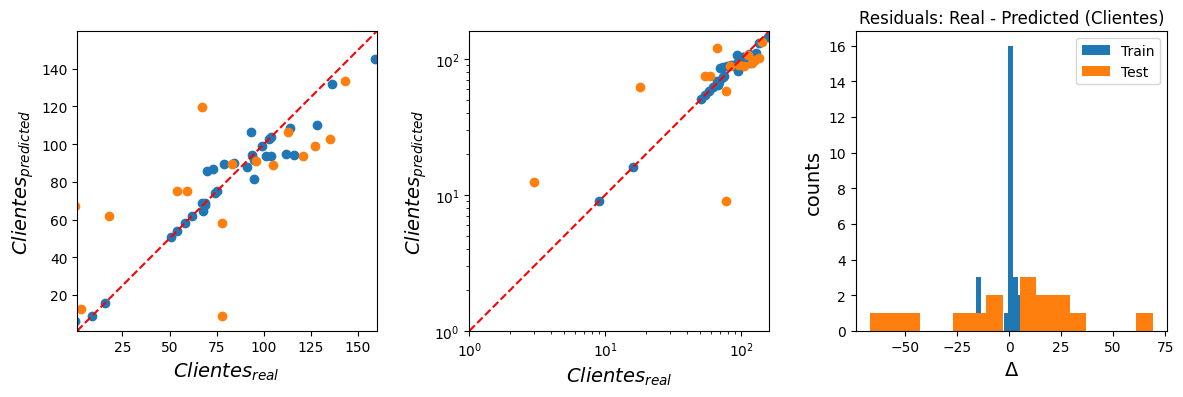

In [60]:
metricas_por_modelo['ada'] = plot_model_predictions(ada_fitted, X_train, X_test, y_train, y_test, return_metrics=True)
metricas_por_modelo['ada']['time'] = {'time':ada_random.cv_results_['mean_fit_time'][ada_random.best_index_]}

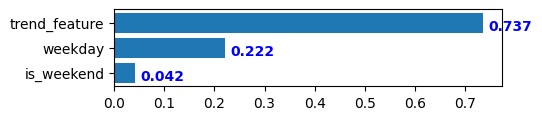

In [61]:
ada_fi = ada_fitted.named_steps['regressor'].feature_importances_
plot_features(ada_fi, X_train)

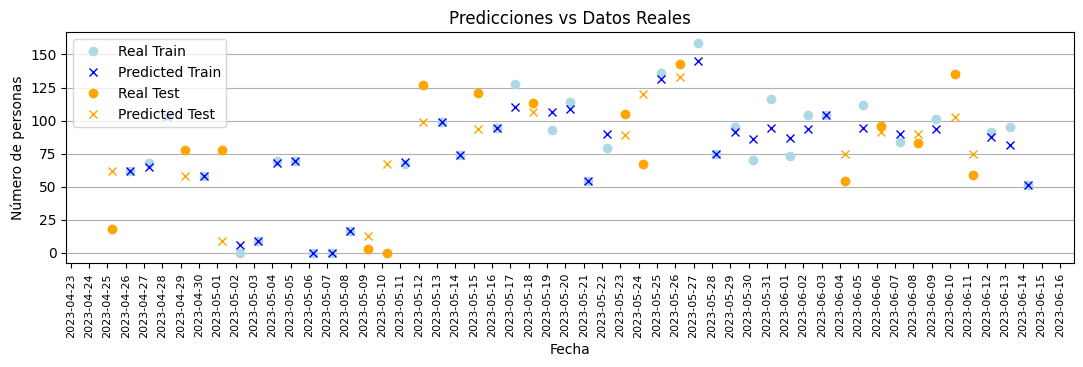

In [62]:
plot_predictions_timeseries(X_train, X_test, y_train, y_test, ada_fitted, figsize=(13, 3), labelsize=8, angle=90)

## Bagging

In [63]:
bag_pipe = homogen_pipeline(X, model_type='bag', random_state=random_state, gpu=False, predict_mode=False)
bag_pipe

Pipeline(steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode_labels',
                                                  OrdinalEncoder(dtype=<class 'int'>,
                                                                 encoded_missing_value=-2,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [])])),
                ('scaling',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  [0, 1, 2])])),
                ('regressor',
                 BaggingRegressor(estimator=DecisionTreeRegressor(random_state=13),
                                  random_state=13))])

In [64]:
bag_learning_rate = np.logspace(-4, 0.1, num=list_size).tolist()[:-1]

bag_scan_parameters = {
    'regressor__n_estimators': [10, 50, 100, 200],  # Número de estimadores en el ensamble
    'regressor__max_samples': [0.5, 0.7, 1.0],  # Proporción de muestras a utilizar para entrenar cada estimador base
    'regressor__max_features': uniform_floats.tolist(),  # Proporción de características a utilizar para entrenar cada estimador base
    'regressor__bootstrap': [True, False],  # Si se utiliza bootstrap (muestreo con reemplazo)
    'regressor__bootstrap_features': [True, False],  # Si se utiliza bootstrap para las características
    'regressor__estimator__max_depth': [3, 5, 10, 20],  # Profundidad máxima de los árboles
    'regressor__estimator__min_samples_split': [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
    'regressor__estimator__min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras en un nodo hoja
    'regressor__estimator__max_features': uniform_floats.tolist(),  # Número de características para buscar la mejor división
    'regressor__estimator__min_impurity_decrease': [0.0, 0.1, 0.2]  # Umbral para la disminución de impureza para dividir un nodo
}

In [65]:
bag_random = RandomizedSearchCV(bag_pipe,
                                  param_distributions=bag_scan_parameters, 
                                  n_iter=n_iter,
                                  cv=cv,
                                  n_jobs=max_n_jobs,
                                  verbose=verbose, 
                                  scoring=rmse_scorer,#'r2')
                                  return_train_score=True, refit=True)

### Entrenamiento AdaBoost

In [66]:
start_time = time.time()

bag_random.fit(X_train, y_train)
bag_fitted = bag_random.best_estimator_

print("--- %s Minutes on training time  ---" % (round((time.time() - start_time)/60,2)))

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits
--- 2.28 Minutes on training time  ---


Train Median per CV: [(0, -35.1062), (1, -29.6782), (2, -24.5487)]
Test Median per CV: [(0, -13.1465), (1, -38.4949), (2, -44.8139)]


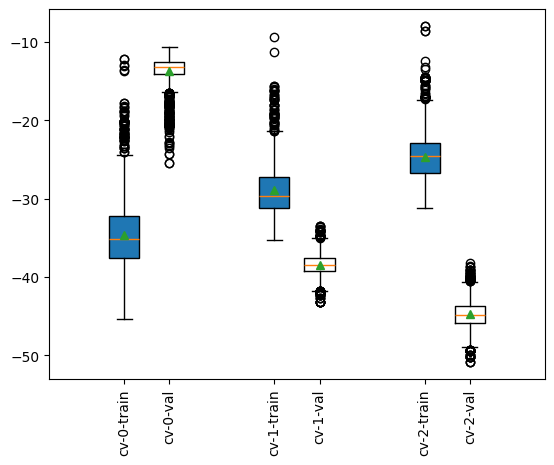

In [67]:
plot_cv_results(bag_random.cv_results_, cv_splits=cv)

In [68]:
print("Best parameter (CV score=%0.3f):" % bag_random.best_score_)
print(bag_random.best_params_)

Best parameter (CV score=-30.242):
{'regressor__n_estimators': 10, 'regressor__max_samples': 0.7, 'regressor__max_features': 0.7515127626298743, 'regressor__estimator__min_samples_split': 2, 'regressor__estimator__min_samples_leaf': 1, 'regressor__estimator__min_impurity_decrease': 0.2, 'regressor__estimator__max_features': 0.2564729455179685, 'regressor__estimator__max_depth': 3, 'regressor__bootstrap_features': False, 'regressor__bootstrap': False}



train:
  rmse: 22.8869,   mae: 17.8569,   mape: 0.8990,   r2: 0.6322

test:
  rmse: 34.1623,   mae: 29.4084,   mape: 0.9040,   r2: 0.3843


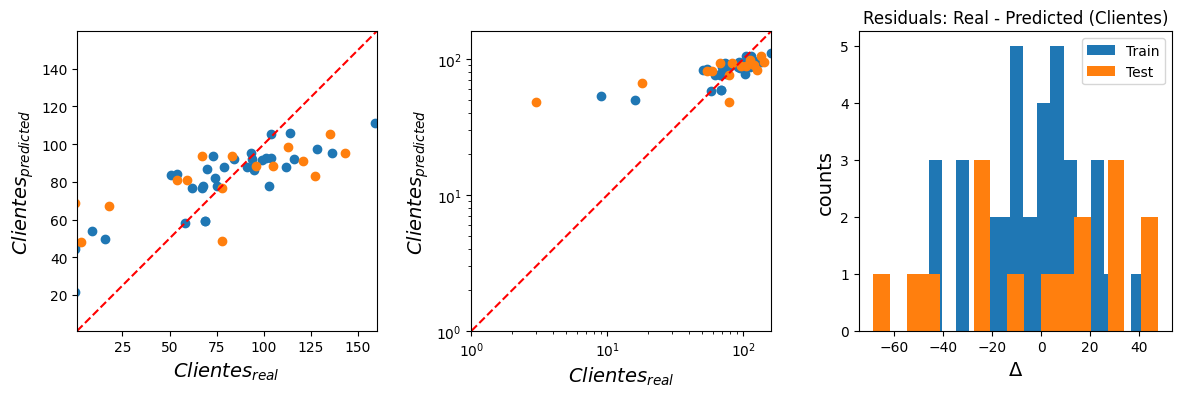

In [69]:
metricas_por_modelo['bag'] = plot_model_predictions(bag_fitted, X_train, X_test, y_train, y_test, return_metrics=True)
metricas_por_modelo['bag']['time'] = {'time':bag_random.cv_results_['mean_fit_time'][bag_random.best_index_]}

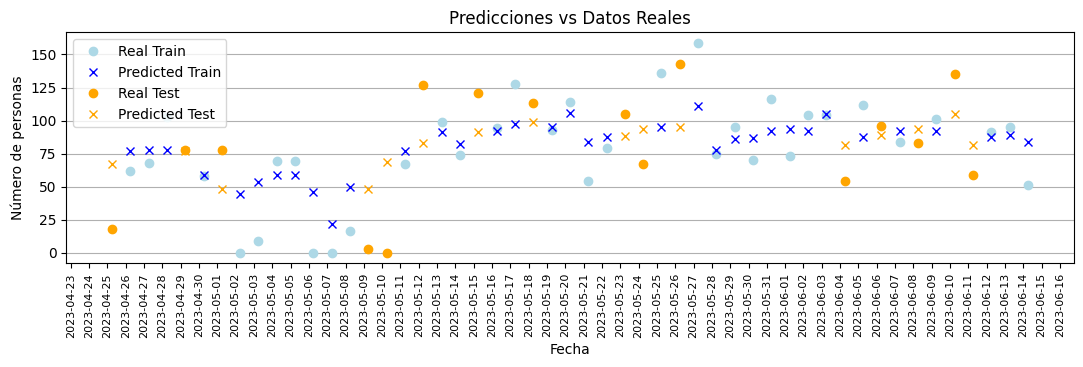

In [70]:
plot_predictions_timeseries(X_train, X_test, y_train, y_test, bag_fitted, figsize=(13, 3), labelsize=8, angle=90)

## Voting

Para el caso de Voting y Stacking, tomaremos los mejores modelos obtenidos previamente como estimadores y agregaremos unos hiperparámetros para optimizar los resultados.

### Ajuste de prefijos

In [71]:
def eliminar_prefijo_regressor(parametros):
    """
    Elimina el prefijo 'regressor__' de las claves del diccionario de parámetros.

    Parámetros:
    - parametros (dict): Diccionario de parámetros con el prefijo 'regressor__'.

    Salida:
    - nuevo_parametros (dict): Nuevo diccionario con las claves modificadas.
    """
    nuevo_parametros = {clave.replace('regressor__', ''): valor for clave, valor in parametros.items()}
    return nuevo_parametros

def ajustar_parametros(estimator_params):
    # Separar los parámetros del estimador base y del meta-estimador
    base_params = {k.replace('estimator__', ''): v for k, v in estimator_params.items() if 'estimator__' in k}
    meta_params = {k: v for k, v in estimator_params.items() if 'estimator__' not in k}
    return base_params, meta_params

In [72]:
best_params = {'xgb':xgb_random.best_params_,
                'rf':rf_random.best_params_,
                'ada':ada_random.best_params_,
                'bag':bag_random.best_params_,
               }

for model, params in best_params.items():
    best_params[model] = eliminar_prefijo_regressor(params)

In [73]:
best_params

{'xgb': {'subsample': 0.9,
  'scale_pos_weight': 1,
  'n_estimators': 39,
  'max_depth': 11,
  'learning_rate': 0.05,
  'lambda': 0.2162,
  'gamma': 0.2847,
  'colsample_bytree': 0.8,
  'colsample_bylevel': 0.8},
 'rf': {'n_estimators': 50,
  'min_weight_fraction_leaf': 0.1,
  'min_samples_split': 20,
  'min_samples_leaf': 2,
  'min_impurity_decrease': 0.4,
  'max_leaf_nodes': 3,
  'max_features': 0.9230664565870295,
  'max_depth': 10,
  'criterion': 'poisson',
  'bootstrap': False},
 'ada': {'n_estimators': 100,
  'loss': 'square',
  'learning_rate': 0.4410059454176732,
  'estimator__min_samples_split': 2,
  'estimator__min_samples_leaf': 1,
  'estimator__max_features': 0.6867550715411339,
  'estimator__max_depth': 4},
 'bag': {'n_estimators': 10,
  'max_samples': 0.7,
  'max_features': 0.7515127626298743,
  'estimator__min_samples_split': 2,
  'estimator__min_samples_leaf': 1,
  'estimator__min_impurity_decrease': 0.2,
  'estimator__max_features': 0.2564729455179685,
  'estimator__ma

### Estimadores pre-entrenados

In [74]:
# Ajustar los parámetros para AdaBoost
ada_base_params, ada_meta_params = ajustar_parametros(best_params['ada'])
ada_estimator = DecisionTreeRegressor(**ada_base_params, random_state=random_state)
ada_regressor = AdaBoostRegressor(ada_estimator, **ada_meta_params, random_state=random_state)

# Ajustar los parámetros para Bagging
bag_base_params, bag_meta_params = ajustar_parametros(best_params['bag'])
bag_estimator = DecisionTreeRegressor(**bag_base_params, random_state=random_state)
bag_regressor = BaggingRegressor(bag_estimator, **bag_meta_params, random_state=random_state)

Utilizando los mejores regresores individuales, creamos los estimadores que serán utilizados en el pipeline del modelo de Voting

In [75]:
# Crear los estimadores con los parámetros ajustados
estimators = [
    ('xgb', XGBRegressor(**best_params['xgb'], random_state=random_state)),
    ('rf', RandomForestRegressor(**best_params['rf'], random_state=random_state)),
    ('ada', ada_regressor),
    ('bag', bag_regressor)
]

In [76]:
vote_pipe = homogen_pipeline(X, model_type='vote', random_state=random_state, gpu=False, predict_mode=False, pretrained=True, estimators=estimators)
vote_pipe

Pipeline(steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode_labels',
                                                  OrdinalEncoder(dtype=<class 'int'>,
                                                                 encoded_missing_value=-2,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [])])),
                ('scaling',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  [0, 1, 2])])),
                ('regressor',
                 VotingRegressor(estimators=[('xgb',
                                              XG...
                                                                                                max_features=0.6867550715411339,
                                                                                                random_state=13),
                                                                learning_rate=0.4410059454176732,
                                                                loss='square',
                                                                n_estimators=100,
                                                                random_state=13)),
                                             ('bag',
                                              BaggingRegressor(bootstrap=False,
                                                               estimator=DecisionTreeRegressor(max_depth=3,
                                                                                               max_features=0.2564729455179685,
                                                                                               min_impurity_decrease=0.2,
                                                                                               random_state=13),
                                                               max_features=0.7515127626298743,
                                                               max_samples=0.7,
                                                               random_state=13))]))])

### Ajustes de llaves en los diccionarios de hiperparámetros

In [77]:
def expand_param_range(original_params, best_params, num_around=1, step_int=1, percent_float=0.01):
    """
    Expande el rango de parámetros alrededor de los mejores parámetros encontrados.

    Descripción:
        Esta función toma un conjunto de parámetros originales y los mejores parámetros encontrados
        y expande el rango de búsqueda alrededor de estos últimos para una búsqueda más fina.

    Entradas:
        original_params (dict): Diccionario con los rangos de parámetros originales.
        best_params (dict): Diccionario con los mejores parámetros encontrados.
        num_around (int, opcional): Número de valores alrededor del mejor parámetro para considerar en la nueva búsqueda.
        step_int (int, opcional): Paso para incrementar/decrementar parámetros enteros.
        percent_float (float, opcional): Porcentaje para incrementar/decrementar parámetros flotantes.

    Salidas:
        new_params (dict): Nuevo diccionario con los rangos de parámetros expandidos.
    """
    new_params = {}
    for key, value in best_params.items():
        # Incluir solo las claves que están en el diccionario original
        if key in original_params:
            original_value = original_params[key]
            # Determinar si el valor original era un flotante, entero o booleano
            if isinstance(original_value[0], float):
                # Crear rangos para flotantes con un límite superior de 1 si es aplicable
                min_value = max(value - (percent_float * num_around), 0)  # Asegurar que el mínimo no sea negativo
                max_value = min(value + (percent_float * num_around), 1) if all(v <= 1 for v in original_value) else value + (percent_float * num_around)
                new_params[key] = [round(min_value + i * ((max_value - min_value) / (num_around * 2)), 5) for i in range(num_around * 2 + 1)]
            elif isinstance(original_value[0], bool):
                # Para booleanos, crear una lista con un solo elemento
                new_params[key] = [value]
            elif isinstance(original_value[0], int):
                # Crear rangos para enteros
                new_params[key] = list(range(max(value - step_int * num_around, 1), min(value + step_int * num_around + 1, max(original_value) + 1), step_int))
            else:
                # Para cadenas y otros tipos, crear una lista con un solo elemento
                new_params[key] = [value]

            if 'samples' in key:
                # Eliminar el número 1 de la lista si está presente
                new_params[key] = [num for num in new_params[key] if num != 1]
    return new_params

In [78]:
expanded_ranges_from_best = {}
params_pairs = {'xgb':[xgb_scan_parameters, xgb_random.best_params_],
                'rf':[rf_scan_parameters, rf_random.best_params_],
                'ada':[ada_scan_parameters, ada_random.best_params_],
                'bag':[bag_scan_parameters, bag_random.best_params_],
               }

In [79]:
for estimator, (scan_par, best_par) in params_pairs.items():
    expanded_ranges_from_best[estimator] = expand_param_range(scan_par, best_par)

In [80]:
expanded_ranges_from_best

{'xgb': {'regressor__subsample': [0.89, 0.9, 0.91],
  'regressor__scale_pos_weight': [1, 2],
  'regressor__n_estimators': [38, 39, 40],
  'regressor__max_depth': [10, 11, 12],
  'regressor__learning_rate': [0.04, 0.05, 0.06],
  'regressor__lambda': [0.2062, 0.2162, 0.2262],
  'regressor__gamma': [0.2747, 0.2847, 0.2947],
  'regressor__colsample_bytree': [0.79, 0.8, 0.81],
  'regressor__colsample_bylevel': [0.79, 0.8, 0.81]},
 'rf': {'regressor__n_estimators': [49, 50, 51],
  'regressor__min_weight_fraction_leaf': [0.09, 0.1, 0.11],
  'regressor__min_samples_split': [19, 20],
  'regressor__min_samples_leaf': [2, 3],
  'regressor__min_impurity_decrease': [0.39, 0.4, 0.41],
  'regressor__max_leaf_nodes': [2, 3, 4],
  'regressor__max_features': [0.91307, 0.92307, 0.93307],
  'regressor__max_depth': [9, 10, 11],
  'regressor__criterion': ['poisson'],
  'regressor__bootstrap': [False]},
 'ada': {'regressor__n_estimators': [99, 100, 101],
  'regressor__loss': ['square'],
  'regressor__learnin

In [81]:
params_prefixed = {}
# Prefijos para cada modelo
model_prefixes = {
    'xgb': '__xgb__',
    'rf': '__rf__',
    'ada': '__ada__',
    'bag': '__bag__'
}

# Función para agregar prefijos a las claves de los diccionarios
def add_prefixes(param_dict, prefix):
    return {f"regressor{prefix}{key[len('regressor__'):]}": value for key, value in param_dict.items()}

# Actualizar diccionarios con prefijos
for estimator, params in expanded_ranges_from_best.items():
    params_prefixed[estimator] = add_prefixes(params, model_prefixes[estimator])

In [82]:
# Combinar todos los diccionarios en uno solo
vote_scan_parameters = {k2: v2 for k1, v1 in params_prefixed.items() for k2, v2 in v1.items()}

### Reduccion de hiperparámetros

In [83]:
import random

def drop_elements_from_lists(param_dict, drop_count=1, seed=None):
    """
    Randomly drops a specified number of elements from each list in the dictionary.

    Args:
        param_dict (dict): Dictionary with parameter names as keys and lists as values.
        drop_count (int): Number of elements to drop from each list.
        seed (int): Random seed for reproducibility.

    Returns:
        dict: New dictionary with elements dropped from lists.
    """
    if seed is not None:
        random.seed(seed)

    new_param_dict = {}
    for key, value_list in param_dict.items():
        if len(value_list) > 1:  # Ensure the list is not left empty
            drop_indices = random.sample(range(len(value_list)), min(drop_count, len(value_list) - 1))
            new_param_dict[key] = [value for idx, value in enumerate(value_list) if idx not in drop_indices]
        else:
            new_param_dict[key] = value_list  # Keep the original list if it only has one element

    return new_param_dict

Creamos un diccionario final para algunos de los hiperparámetros de ajuste

In [84]:
vote_scan_parameters = drop_elements_from_lists(vote_scan_parameters, drop_count=1, seed=random_state)
vote_scan_parameters

{'regressor__xgb__subsample': [0.89, 0.91],
 'regressor__xgb__scale_pos_weight': [1],
 'regressor__xgb__n_estimators': [38, 39],
 'regressor__xgb__max_depth': [10, 11],
 'regressor__xgb__learning_rate': [0.05, 0.06],
 'regressor__xgb__lambda': [0.2062, 0.2162],
 'regressor__xgb__gamma': [0.2847, 0.2947],
 'regressor__xgb__colsample_bytree': [0.79, 0.8],
 'regressor__xgb__colsample_bylevel': [0.8, 0.81],
 'regressor__rf__n_estimators': [50, 51],
 'regressor__rf__min_weight_fraction_leaf': [0.09, 0.1],
 'regressor__rf__min_samples_split': [20],
 'regressor__rf__min_samples_leaf': [3],
 'regressor__rf__min_impurity_decrease': [0.4, 0.41],
 'regressor__rf__max_leaf_nodes': [2, 3],
 'regressor__rf__max_features': [0.92307, 0.93307],
 'regressor__rf__max_depth': [9, 10],
 'regressor__rf__criterion': ['poisson'],
 'regressor__rf__bootstrap': [False],
 'regressor__ada__n_estimators': [99, 101],
 'regressor__ada__loss': ['square'],
 'regressor__ada__learning_rate': [0.44101, 0.45101],
 'regress

In [85]:
vote_random = RandomizedSearchCV(vote_pipe,
                                  param_distributions=vote_scan_parameters, 
                                  n_iter=n_iter,
                                  cv=cv,
                                  n_jobs=max_n_jobs,
                                  verbose=verbose, 
                                  scoring=rmse_scorer,#'r2')
                                  return_train_score=True, refit=True)

### Entrenamiento Voting

In [86]:
start_time = time.time()

vote_random.fit(X_train, y_train)
vote_fitted = vote_random.best_estimator_

print("--- %s Minutes on training time  ---" % (round((time.time() - start_time)/60,2)))

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits
--- 3.98 Minutes on training time  ---


Train Median per CV: [(0, -21.9009), (1, -19.1694), (2, -16.5917)]
Test Median per CV: [(0, -15.5594), (1, -31.1452), (2, -38.1249)]


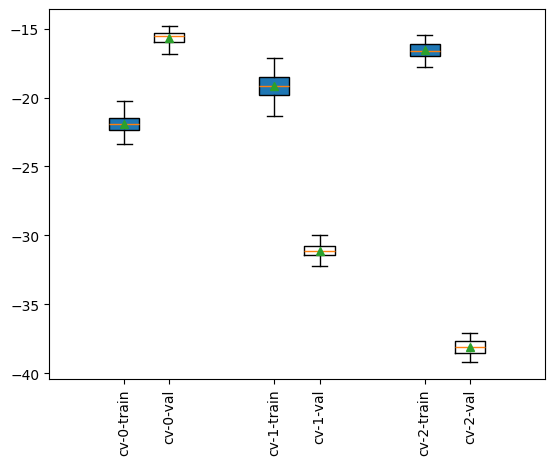

In [87]:
plot_cv_results(vote_random.cv_results_, cv_splits=cv)

In [88]:
print("Best parameter (CV score=%0.3f):" % vote_random.best_score_)
print(vote_random.best_params_)

Best parameter (CV score=-27.455):
{'regressor__xgb__subsample': 0.89, 'regressor__xgb__scale_pos_weight': 1, 'regressor__xgb__n_estimators': 38, 'regressor__xgb__max_depth': 10, 'regressor__xgb__learning_rate': 0.06, 'regressor__xgb__lambda': 0.2162, 'regressor__xgb__gamma': 0.2947, 'regressor__xgb__colsample_bytree': 0.8, 'regressor__xgb__colsample_bylevel': 0.81, 'regressor__rf__n_estimators': 51, 'regressor__rf__min_weight_fraction_leaf': 0.1, 'regressor__rf__min_samples_split': 20, 'regressor__rf__min_samples_leaf': 3, 'regressor__rf__min_impurity_decrease': 0.41, 'regressor__rf__max_leaf_nodes': 3, 'regressor__rf__max_features': 0.93307, 'regressor__rf__max_depth': 9, 'regressor__rf__criterion': 'poisson', 'regressor__rf__bootstrap': False, 'regressor__bag__n_estimators': 10, 'regressor__bag__max_samples': 0.7, 'regressor__bag__max_features': 0.74151, 'regressor__bag__estimator__min_samples_split': 3, 'regressor__bag__estimator__min_samples_leaf': 2, 'regressor__bag__estimator__m


train:
  rmse: 18.8228,   mae: 14.4178,   mape: 0.8990,   r2: 0.7512

test:
  rmse: 31.3618,   mae: 27.7827,   mape: 0.9040,   r2: 0.4811


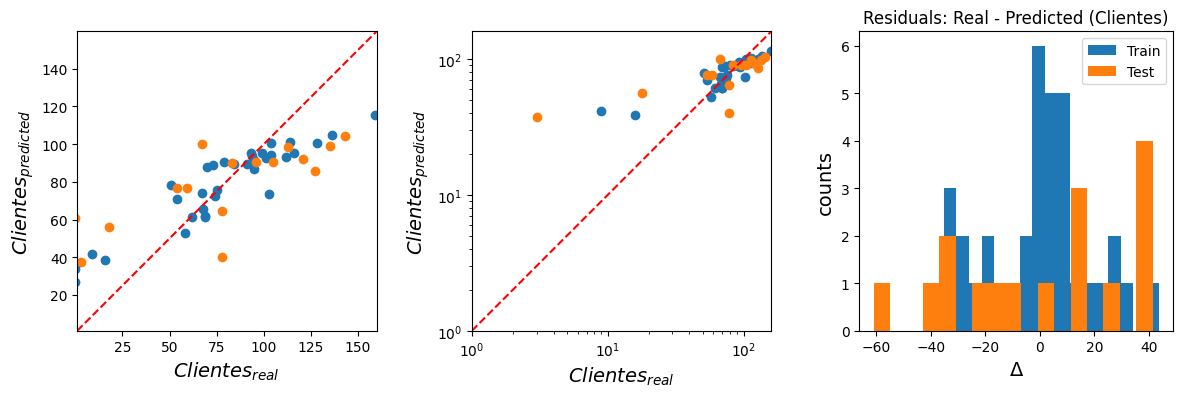

In [89]:
metricas_por_modelo['vote'] = plot_model_predictions(vote_fitted, X_train, X_test, y_train, y_test, return_metrics=True)
metricas_por_modelo['vote']['time'] = {'time':vote_random.cv_results_['mean_fit_time'][vote_random.best_index_]}

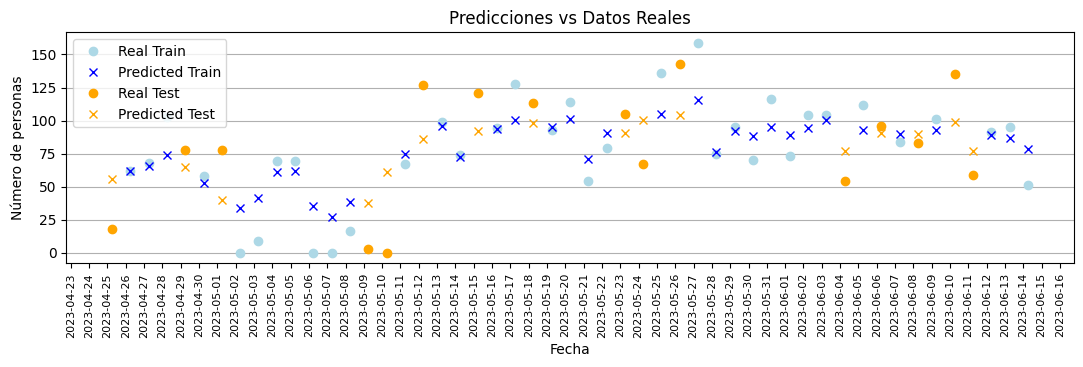

In [90]:
plot_predictions_timeseries(X_train, X_test, y_train, y_test, vote_fitted, figsize=(13, 3), labelsize=8, angle=90)

## Stacking

In [91]:
stack_pipe = homogen_pipeline(X, model_type='stack', random_state=random_state, gpu=False, predict_mode=False, pretrained=True, estimators=estimators)
stack_pipe

Pipeline(steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode_labels',
                                                  OrdinalEncoder(dtype=<class 'int'>,
                                                                 encoded_missing_value=-2,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [])])),
                ('scaling',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  [0, 1, 2])])),
                ('regressor',
                 StackingRegressor(estimators=[('xgb',...
                                                                  learning_rate=0.4410059454176732,
                                                                  loss='square',
                                                                  n_estimators=100,
                                                                  random_state=13)),
                                               ('bag',
                                                BaggingRegressor(bootstrap=False,
                                                                 estimator=DecisionTreeRegressor(max_depth=3,
                                                                                                 max_features=0.2564729455179685,
                                                                                                 min_impurity_decrease=0.2,
                                                                                                 random_state=13),
                                                                 max_features=0.7515127626298743,
                                                                 max_samples=0.7,
                                                                 random_state=13))],
                                   final_estimator=RandomForestRegressor(random_state=13)))])

### Regresor final

In [92]:
def agregar_prefijo_final_estimator(parametros):
    """
    Agrega el prefijo 'final_estimator__' después de 'regressor__' en las claves del diccionario.

    Parámetros:
    - parametros (dict): Diccionario de parámetros con el prefijo 'regressor__'.

    Salida:
    - nuevo_parametros (dict): Nuevo diccionario con las claves modificadas.
    """
    nuevo_parametros = {clave.replace('regressor__', 'regressor__final_estimator__'): valor for clave, valor in parametros.items()}
    return nuevo_parametros

In [93]:
stack_scan_parameters = agregar_prefijo_final_estimator(rf_scan_parameters)

In [94]:
stack_random = RandomizedSearchCV(stack_pipe,
                                  param_distributions=stack_scan_parameters, 
                                  n_iter=n_iter,
                                  cv=cv,
                                  n_jobs=max_n_jobs,
                                  verbose=verbose, 
                                  scoring=rmse_scorer,#'r2')
                                  return_train_score=True, refit=True)

### Entrenamiento stacking

In [ ]:
start_time = time.time()

stack_random.fit(X_train, y_train)
stack_fitted = stack_random.best_estimator_

print("--- %s Minutes on training time  ---" % (round((time.time() - start_time)/60,2)))

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits


In [ ]:
plot_cv_results(stack_random.cv_results_, cv_splits=cv)

In [ ]:
print("Best parameter (CV score=%0.3f):" % stack_random.best_score_)
print(stack_random.best_params_)

In [ ]:
metricas_por_modelo['stack'] = plot_model_predictions(stack_fitted, X_train, X_test, y_train, y_test, return_metrics=True)
metricas_por_modelo['stack']['time'] = {'time':stack_random.cv_results_['mean_fit_time'][stack_random.best_index_]}

In [ ]:
plot_predictions_timeseries(X_train, X_test, y_train, y_test, stack_fitted, figsize=(13, 3), labelsize=8, angle=90)

# Análisis de métricas

In [ ]:
from librerias_integrador.models.metrics import plot_metrics

In [ ]:
metricas_por_modelo_df = pd.DataFrame.from_dict({(i,j): metricas_por_modelo[i][j]
                             for i in metricas_por_modelo.keys()
                             for j in metricas_por_modelo[i].keys()},
                            orient='index')

# Renombrar los índices
metricas_por_modelo_df.index = pd.MultiIndex.from_tuples(metricas_por_modelo_df.index, names=["modelo", "dataset"])

sort_order = metricas_por_modelo_df.xs('test', level='dataset').sort_values(by='rmse').index

metricas_por_modelo_df = metricas_por_modelo_df.reindex(sort_order, level='modelo')
metricas_por_modelo_df

In [ ]:
metricas = ['rmse','mae','mape','r2']
plot_metrics(metricas_por_modelo_df, metricas)

In [ ]:
def plot_training_times(tiempo_por_modelo_df):
    """
    Genera un gráfico de barras para los tiempos de entrenamiento de modelos de machine learning.

    Parámetros:
    - tiempo_por_modelo_df (DataFrame): Un DataFrame con los tiempos de entrenamiento de los modelos.

    Salida:
    - Un gráfico de barras que muestra los tiempos de entrenamiento por modelo.
    """
    # Filtrar los datos para obtener solo los tiempos de entrenamiento
    training_times = tiempo_por_modelo_df.xs('time', level='dataset')['time']
    
    # Crear el gráfico de barras
    plt.figure(figsize=(5, 3))
    training_times.plot(kind='bar', color='skyblue')
    
    # Establecer el título y las etiquetas
    plt.title('Tiempos promedio de Entrenamiento por Modelo')
    plt.xlabel('Modelo')
    plt.ylabel('Tiempo (segundos)')
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

## Tiempos promedio de entrenamiento

In [ ]:
plot_training_times(metricas_por_modelo_df)

# Analisis de resultados

Basado en los resultados de entrenamiento de tus modelos:

Mejor RMSE: El modelo Random Forest (RF) muestra el mejor rendimiento en términos de RMSE, tanto en el conjunto de entrenamiento como en el de prueba, lo que indica una menor cantidad de error en las predicciones.
Indicios de Sobreajuste: El modelo Stacking exhibe un rendimiento escalonado, sugiriendo posible sobreajuste, dado que su rendimiento en el conjunto de entrenamiento es significativamente mejor que en el conjunto de prueba.
Comparación con Dummy: Todos los modelos superan al modelo Dummy, lo que demuestra una mejora general en la precisión de las predicciones.
Mejor R2: El modelo RF también destaca en términos de coeficiente de determinación (R2), especialmente en el conjunto de prueba, lo que implica una mayor proporción de la varianza explicada por el modelo.

- **Random Forest (RF):** Este modelo ha demostrado ser el más eficaz en términos de RMSE, con valores de 19.879392 para el conjunto de entrenamiento y 26.300869 para el conjunto de prueba. Esto indica que el modelo RF tiene una buena capacidad de generalización y es capaz de manejar la varianza y el sesgo de manera efectiva. Además, el RF tiene el mejor coeficiente de determinación (R2) en el conjunto de prueba con un valor de 0.635088, lo que sugiere que puede explicar aproximadamente el 63.5% de la variabilidad de la respuesta.
- **Stacking:** Aunque el modelo de Stacking muestra un RMSE competitivo en el conjunto de entrenamiento con 22.380860, su rendimiento disminuye en el conjunto de prueba a 28.883668, lo que podría indicar un sobreajuste. Esto se debe a que el modelo se ajusta demasiado a los datos de entrenamiento y pierde capacidad de generalización.
- **Voting:** El modelo Voting presenta un RMSE de 19.060533 en el conjunto de entrenamiento y 28.919345 en el conjunto de prueba. Aunque su rendimiento en el conjunto de prueba no es el mejor, sigue siendo una opción robusta debido a su capacidad para combinar las fortalezas de varios modelos.
- **XGBoost (XGB):** Este modelo tiene el mejor rendimiento en el conjunto de entrenamiento con un RMSE de 13.803081, pero su rendimiento en el conjunto de prueba cae a 29.136304, lo que también puede ser un indicativo de sobreajuste.
- **AdaBoost (ADA) y Bagging:** Estos modelos tienen un rendimiento inferior en comparación con RF y Voting, especialmente en el conjunto de prueba, lo que sugiere que podrían no ser adecuados para este conjunto de datos específico o que requieren una afinación más detallada de sus hiperparámetros.

La velocidad de entrenamiento es un factor crucial al elegir un modelo de machine learning, especialmente cuando se trabaja con grandes volúmenes de datos o bajo restricciones de tiempo. En el caso del Random Forest (RF), se destaca por su eficiencia en el entrenamiento. Esto se debe a que RF puede entrenar cada árbol de decisión en el ensamble de manera independiente, lo que permite la paralelización y, por ende, una reducción significativa en el tiempo de entrenamiento. Por otro lado, el modelo de Stacking tiende a ser más lento debido a la naturaleza secuencial de su entrenamiento, ya que requiere construir y combinar las predicciones de múltiples modelos base antes de entrenar el meta-modelo final. Esta complejidad adicional puede resultar en un proceso de entrenamiento más prolongado.

En resumen, mientras que RF ofrece una solución más rápida y directa, mientras que el Stacking es mas lento en ese aspecto.